#### Name: Kieran selvon 
### Data Science coding example


The Following IPython notebook is adapted from a workshop I gave on data wrangling with Pandas, it now contains the following four main sections:

Hampshire police data example:
- Reading in csv files into a Dataframe using Ipython magic
- How to drop multiple columns 
- The use of various Pandas methods such as .to_datetime, .value_counts etc  
- Dataframe masking by string specification 
- Examples of visualisation using matplotlib's object oriented interface

Converting Numpy data to LaTeX:
- The removal of Nans from Dataframes using .dropna
- Replacing Nans in Dataframes with column averages using .fillna
- Outputting tabular Latex code with Pandas using .to_latex method

Simple least squares regression with statsmodels:
- A simple example of linear regression with the statsmodels package
- Setting up and running the linear regression 
- Viewing the summary results and plotting the residuals 
- Adding in a squared term into the model and seeing how it effects the     summary values 

Multiple linear regression, dummy variables, prediciting with train/test split:
- Loading in sklearn toy dataset into a Pandas Dataframe 
- Add the column names no longer present in the data 
- Recovering a Gender column which has been transformed into a numeric       variable, back into a string column 
- Apply dummy variables to the new string column and append them to the     original Dataframe
- (Commented out) a quick example how to scale/transform data in a           Dataframe
- Plot each each attribute in the data against the target to check for       linearity, this time using matplotlibs functional interface 
- Place the linearly correlated attributes in a new numpy array 
- Place the target data in a numpy array 
- Split the data into a 80/20 training/test set 
- Apply a linear regression model with all the variables 
- Plot predicted against test values and observe the model score 
- Check the variables for collinearity, drop some variables
- Reapply a linear regression for our improved model and 
  plot the new models predicted against test values and observe the score
 
The following packages are used: pandas, numpy, matplotlib, pylab, sklearn, scipy, statsmodels, warnings


#### Import all needed packages for the notebook

In [474]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn import datasets
from sklearn.cross_validation import train_test_split 
from sklearn.linear_model import LinearRegression
import scipy.stats
import statsmodels.api as sm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = 5, 10
%matplotlib inline

# Hampshire police data example

#### Reading in multiple .csv files using iPython magic commands
#### Using pandas to merge the data into one data frame

In [475]:
files = !ls ./police/*/*.csv # IPython magic to find csv files in different folders
police_data = pd.concat([pd.read_csv(f) for f in files])
police_data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2014-02,Hampshire Constabulary,Hampshire Constabulary,-1.147727,51.353443,On or near The Beeches,E01022553,Basingstoke and Deane 001A,Anti-social behaviour,NaN,NaN
1,NaN,2014-02,Hampshire Constabulary,Hampshire Constabulary,-1.147727,51.353443,On or near The Beeches,E01022553,Basingstoke and Deane 001A,Anti-social behaviour,NaN,NaN
2,11d1dc5bcf3f349c84f3ef9982a71f8a019516814bc63d...,2014-02,Hampshire Constabulary,Hampshire Constabulary,-1.146835,51.349633,On or near Sarisbury Close,E01022553,Basingstoke and Deane 001A,Burglary,Investigation complete; no suspect identified,NaN
3,b05186dfd8a67f327d3019ccc130aeffb7fc35489aea99...,2014-02,Hampshire Constabulary,Hampshire Constabulary,-1.144108,51.354973,On or near Honeybottom Road,E01022553,Basingstoke and Deane 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN
4,a50b6917a9b9b0ba26a236ebe5f4a85681f1283e9dd9c9...,2014-02,Hampshire Constabulary,Hampshire Constabulary,-1.147727,51.353443,On or near The Beeches,E01022553,Basingstoke and Deane 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN


#### Discarding the columns we are not interested in using the drop command

In [476]:
discarded_columns = ['Longitude', 'Latitude', 'Crime ID', 'Reported by', 'Falls within', 'LSOA code', 'LSOA name', 'Last outcome category', 'Context']

In [477]:
police_data = police_data.drop(discarded_columns, axis=1)
police_data.head()

,Month,Location,Crime type
0,2014-02,On or near The Beeches,Anti-social behaviour
1,2014-02,On or near The Beeches,Anti-social behaviour
2,2014-02,On or near Sarisbury Close,Burglary
3,2014-02,On or near Honeybottom Road,Criminal damage and arson
4,2014-02,On or near The Beeches,Criminal damage and arson


#### Convert the month column into pandas date type

In [478]:
police_data['Month'] = pd.to_datetime(police_data['Month'])

#### Obtain the possible crime types

In [479]:
crime_types = pd.unique(police_data['Crime type'])
crime_types

array(['Anti-social behaviour', 'Burglary', 'Criminal damage and arson',
       'Other theft', 'Violence and sexual offences', 'Public order',
       'Shoplifting', 'Drugs', 'Possession of weapons', 'Vehicle crime',
       'Other crime', 'Theft from the person', 'Robbery', 'Bicycle theft'], dtype=object)

### Burgess road crime statistics

#### Sorting the data by location, and searching for the road we are interested in. The head command prints the first 5 entries.

In [480]:
university_crime = police_data[police_data['Location'].str.contains("Burgess Road")]
print(np.shape(university_crime))
university_crime.head()

(192, 3)


,Month,Location,Crime type
7181,2014-02-01,On or near Burgess Road,Burglary
7185,2014-02-01,On or near Burgess Road,Public order
336,2014-03-01,On or near Burgess Road,Criminal damage and arson
341,2014-03-01,On or near Burgess Road,Violence and sexual offences
8594,2014-03-01,On or near Burgess Road,Anti-social behaviour


#### Alternatively, use array slicing to obtain the sub-section required

In [481]:
university_crime[:5]

,Month,Location,Crime type
7181,2014-02-01,On or near Burgess Road,Burglary
7185,2014-02-01,On or near Burgess Road,Public order
336,2014-03-01,On or near Burgess Road,Criminal damage and arson
341,2014-03-01,On or near Burgess Road,Violence and sexual offences
8594,2014-03-01,On or near Burgess Road,Anti-social behaviour


#### Filtering the data for the type of criminal behaviour, we choose bicycle theft.

In [482]:
university_crime_type = university_crime[university_crime['Crime type'].str.contains("Bicycle")]
print(np.shape(university_crime_type))
university_crime_type

(6, 3)


,Month,Location,Crime type
440,2014-07-01,On or near Burgess Road,Bicycle theft
9080,2014-12-01,On or near Burgess Road,Bicycle theft
10901,2015-03-01,On or near Burgess Road,Bicycle theft
10902,2015-03-01,On or near Burgess Road,Bicycle theft
10773,2015-04-01,On or near Burgess Road,Bicycle theft
11745,2015-06-01,On or near Burgess Road,Bicycle theft


#### List the possible criminal offenses by using the 'unique' command

In [483]:
crime_list = pd.unique(police_data['Crime type'])
crime_list

array(['Anti-social behaviour', 'Burglary', 'Criminal damage and arson',
       'Other theft', 'Violence and sexual offences', 'Public order',
       'Shoplifting', 'Drugs', 'Possession of weapons', 'Vehicle crime',
       'Other crime', 'Theft from the person', 'Robbery', 'Bicycle theft'], dtype=object)

#### Count the number of each crime type on Burgess road

In [484]:
university_crime_count = university_crime['Crime type'].value_counts()
university_crime_count

Anti-social behaviour           84
Public order                    20
Violence and sexual offences    18
Criminal damage and arson       17
Burglary                        16
Other theft                     13
Drugs                            8
Bicycle theft                    6
Vehicle crime                    5
Other crime                      2
Shoplifting                      2
Possession of weapons            1
Name: Crime type, dtype: int64

#### Plot the crime counts as a bar chart

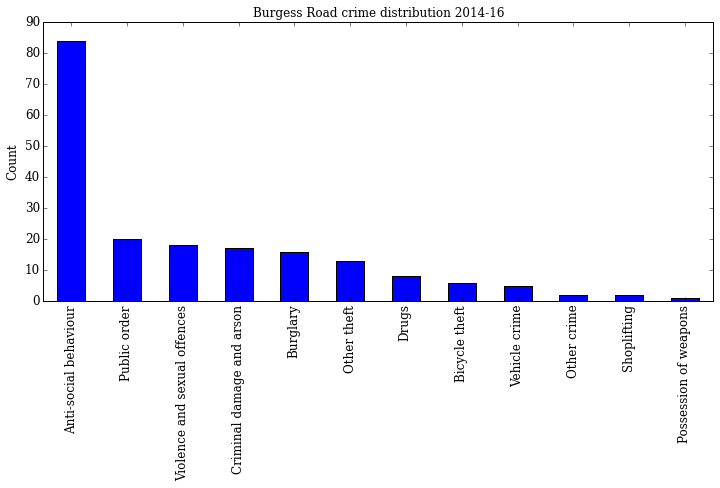

In [485]:
ax = university_crime_count.plot(kind='bar',figsize=(12, 5),title='Burgess Road crime distribution 2014-16', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

#### Count the number of crimes in Burgess road per month over the past 2 years

In [486]:
university_crime_monthly = university_crime['Month'].value_counts()
university_crime_monthly

2015-03-01    25
2015-06-01    18
2014-07-01    14
2014-11-01    13
2015-04-01    12
2014-08-01    10
2015-07-01     9
2015-05-01     9
2014-09-01     8
2014-06-01     8
2016-01-01     6
2015-12-01     6
2015-11-01     6
2014-12-01     5
2015-01-01     5
2014-04-01     5
2015-10-01     5
2015-08-01     5
2014-10-01     4
2015-09-01     4
2016-02-01     4
2014-03-01     3
2015-02-01     3
2014-05-01     3
2014-02-01     2
Name: Month, dtype: int64

#### Plot the monthly crime count for Burgess road

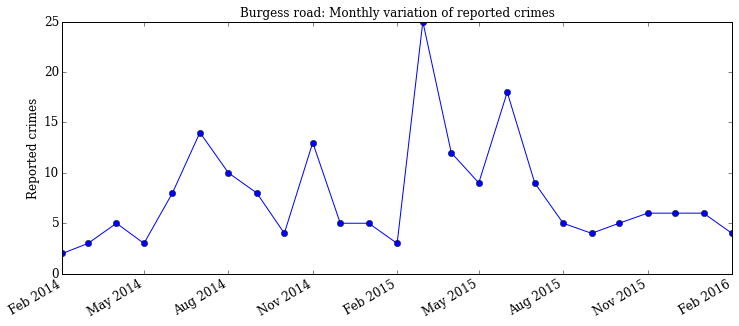

In [487]:
ax2 = university_crime_monthly.plot(kind='line',marker='o',figsize=(12, 5),title='Burgess road: Monthly variation of reported crimes', fontsize=12)
ax2.set_ylabel('Reported crimes', fontsize=12)

### Hampshire crime statistics

#### Comparing the crimes for December 2014 and 2015

In [488]:
xmas2014= police_data[police_data.Month == '2014-12-01']
xmas2015= police_data[police_data.Month == '2015-12-01']
xmas2015.head()

,Month,Location,Crime type
0,2015-12-01,On or near Glendale Road,Anti-social behaviour
1,2015-12-01,On or near Stanfield,Anti-social behaviour
2,2015-12-01,On or near Stanfield,Violence and sexual offences
3,2015-12-01,On or near Searing Way,Anti-social behaviour
4,2015-12-01,On or near Inhurst Way,Other theft


#### Text summary of the top crime statistics for the two months

In [489]:
xmas2014['Crime type'].value_counts().head()

Anti-social behaviour           4705
Violence and sexual offences    1653
Criminal damage and arson       1332
Other theft                      971
Burglary                         971
Name: Crime type, dtype: int64

In [490]:
xmas2015['Crime type'].value_counts().head()

Anti-social behaviour           4561
Violence and sexual offences    2267
Criminal damage and arson       1462
Burglary                         927
Shoplifting                      913
Name: Crime type, dtype: int64

#### Comparing the crime rate sorted by offense type on the same bar chart

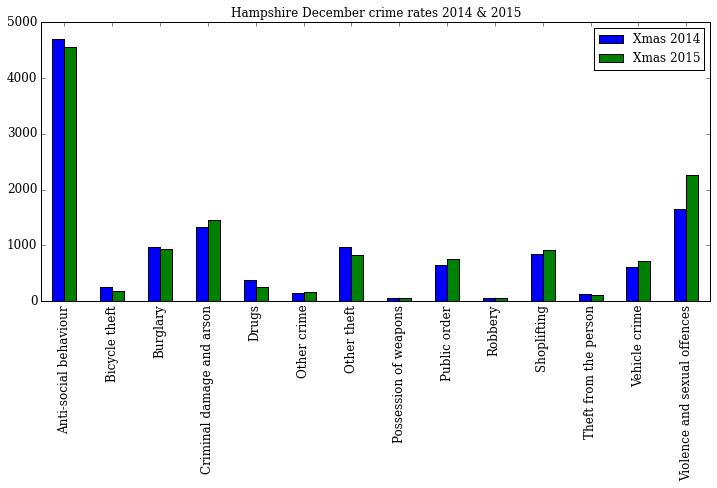

In [491]:
xmas2014_count = xmas2014['Crime type'].value_counts()
xmas2014_count.name = 'Xmas 2014'
xmas2015_count = xmas2015['Crime type'].value_counts()
xmas2015_count.name = 'Xmas 2015'
new_xmas = pd.concat([xmas2014_count, xmas2015_count], axis=1)
new_xmas.plot(kind='bar', figsize=(12, 5),title='Hampshire December crime rates 2014 & 2015', fontsize=12)

#### Grouping by Month and crime type to see the most common locations for each crime per month

#### Generic locations reported by the police dominate the data set over individual roads

In [492]:
group_by_example = police_data.groupby(['Month', 'Crime type']).describe()
group_by_example

Location
Month      Crime type                                                   
2014-02-01 Anti-social behaviour        count                       3893
                                        unique                      2097
                                        top       On or near Supermarket
                                        freq                         187
           Bicycle theft                count                        222
                                        unique                       161
                                        top     On or near Shopping Area
                                        freq                          11
           Burglary                     count                        758
                                        unique                       581
                                        top      On or near Parking Area
                                        freq                          27
           Criminal damage and arson    count                       1197
                                        unique                       847
                                        top      On or near Parking Area
                                        freq                          48
           Drugs                        count                        420
                                        unique                       290
                                        top      On or near Parking Area
                                        freq                          30
           Other crime                  count                        124
                                        unique                       103
                                        top     On or near Shopping Area
                                        freq                           5
           Other theft                  count                        645
                                        unique                       439
                                        top       On or near Supermarket
                                        freq                          40
           Possession of weapons        count                         46
                                        unique                        44
...                                                                  ...
2016-02-01 Other theft                  top       On or near Supermarket
                                        freq                          48
           Possession of weapons        count                         67
                                        unique                        50
                                        top       On or near Supermarket
                                        freq                           9
           Public order                 count                        778
                                        unique                       501
                                        top       On or near Supermarket
                                        freq                          61
           Robbery                      count                         52
                                        unique                        36
                                        top      On or near Parking Area
                                        freq                           6
           Shoplifting                  count                        969
                                        unique                       186
                                        top       On or near Supermarket
                                        freq                         300
           Theft from the person        count                         92
                                        unique                        60
                                        top       On or near Supermarket
                                        freq                          11
           Vehicle crime                count    

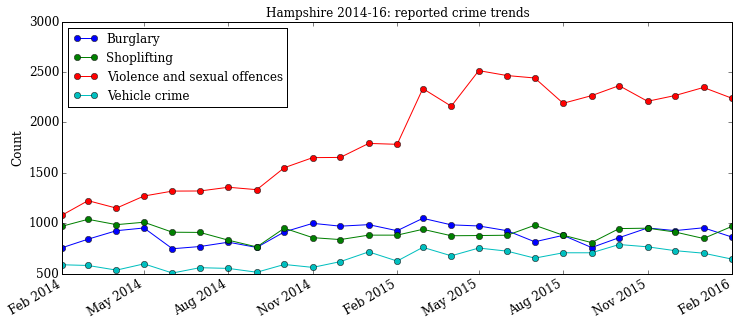

In [493]:
crimes = ['Burglary', 'Shoplifting', 'Violence and sexual offences','Vehicle crime']
for crime in crimes: 
    crime_sort = police_data[police_data['Crime type'].str.contains(crime)]
    monthlycount = crime_sort['Month'].value_counts()
    ax3 = monthlycount.plot(kind='line',marker='o', label=crime,figsize=(12, 5),\
                            title='Hampshire 2014-16: reported crime trends', fontsize=12)
ax3.set_ylabel("Count", fontsize=12)
ax3.legend(loc="best")

#### Variation in total number of reported crimes over the two year period

In [494]:
hampshire_crime_monthly = police_data['Month'].value_counts()

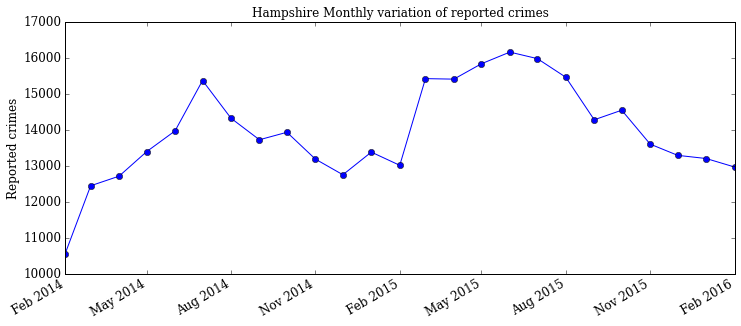

In [495]:
ax2 = hampshire_crime_monthly.plot(kind='line',marker='o',figsize=(12, 5),title='Hampshire Monthly variation of reported crimes', fontsize=12)
ax2.set_ylabel('Reported crimes', fontsize=12)

### Converting Numpy data to LaTeX

#### We create some numerical data in numpy arrays, hstack into one large array

#### Manually add some NaN entries to the data set for removal

In [496]:
x = np.linspace(0,9,10).reshape([10,1])*5
y = np.linspace(10,19,10).reshape([10,1])*10
z = np.random.rand(10).reshape([10,1])*15
output = np.hstack((x,y,z))
output[3,1] = np.nan
output[7,2] = np.nan

In [497]:
column_labels = ['X', 'Y', 'Z']
output_dataframe = pd.DataFrame(output, columns = column_labels)
output_dataframe

,X,Y,Z
0,0.0,100.0,1.113626
1,5.0,110.0,5.460269
2,10.0,120.0,11.766036
3,15.0,NaN,10.262709
4,20.0,140.0,11.657086
5,25.0,150.0,14.902897
6,30.0,160.0,11.377022
7,35.0,170.0,NaN
8,40.0,180.0,4.254482
9,45.0,190.0,6.296259


#### Use the pandas 'dropna' command to remove all rows containing missing data. Alternatively these can be set to a desired value, such as the average of the column.

In [498]:
output_dataframe_nonan = output_dataframe.dropna()
output_dataframe_nonan



,X,Y,Z
0,0.0,100.0,1.113626
1,5.0,110.0,5.460269
2,10.0,120.0,11.766036
4,20.0,140.0,11.657086
5,25.0,150.0,14.902897
6,30.0,160.0,11.377022
8,40.0,180.0,4.254482
9,45.0,190.0,6.296259


In [499]:
# alternatively  we could replace the Nans with the average values of the 
# respective columns
output_dataframe.fillna(output_dataframe.mean())

,X,Y,Z
0,0.0,100.000000,1.113626
1,5.0,110.000000,5.460269
2,10.0,120.000000,11.766036
3,15.0,146.666667,10.262709
4,20.0,140.000000,11.657086
5,25.0,150.000000,14.902897
6,30.0,160.000000,11.377022
7,35.0,170.000000,8.565599
8,40.0,180.000000,4.254482
9,45.0,190.000000,6.296259


#### Output the table to LaTex with to_latex command, index=None removes the row numbering

#### Need to use the /usepackage{booktabs} command in the LaTeX document

In [500]:
print(output_dataframe.to_latex(index=None))

\begin{tabular}{rrr}
\toprule
    X &      Y &          Z \\
\midrule
  0.0 &  100.0 &   1.113626 \\
  5.0 &  110.0 &   5.460269 \\
 10.0 &  120.0 &  11.766036 \\
 15.0 &    NaN &  10.262709 \\
 20.0 &  140.0 &  11.657086 \\
 25.0 &  150.0 &  14.902897 \\
 30.0 &  160.0 &  11.377022 \\
 35.0 &  170.0 &        NaN \\
 40.0 &  180.0 &   4.254482 \\
 45.0 &  190.0 &   6.296259 \\
\bottomrule
\end{tabular}



# Simple least squares regression with statsmodels 

### Create two arrays of data

In [502]:
Dispensers = np.array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6])
Sales = np.array([508.1, 498.4, 568.2, 577.3, 651.7, 657.0, 713.4, 697.5, 755.3, 758.9, 787.6, 792.1, 841.4, 831.8])

### Fit the linear model and produce a regression summary

In [503]:
Data = { 'Dispensers': Dispensers,
        'Sales': Sales}
df = pd.DataFrame(Data, columns=['Dispensers', 'Sales'])
linear_model1 = sm.formula.ols(formula='Sales ~ Dispensers',data=df).fit()
linear_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     545.5
Date:                Thu, 27 Jun 2019   Prob (F-statistic):           2.26e-11
Time:                        14:03:31   Log-Likelihood:                -58.927
No. Observations:                  14   AIC:                             121.9
Df Residuals:                      12   BIC:                             123.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    523.8000      8.474     61.812      0.000       505.337   542.263
Dispensers    54.8929      2.350     23.356      0.000        49.772    60.014
==============================================================================
Omnibus:                        2.979   Durbin-Watson:                   0.516
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                1.111
Skew:                           0.103   Prob(JB):                        0.574
Kurtosis:                       1.635   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot the residual summary

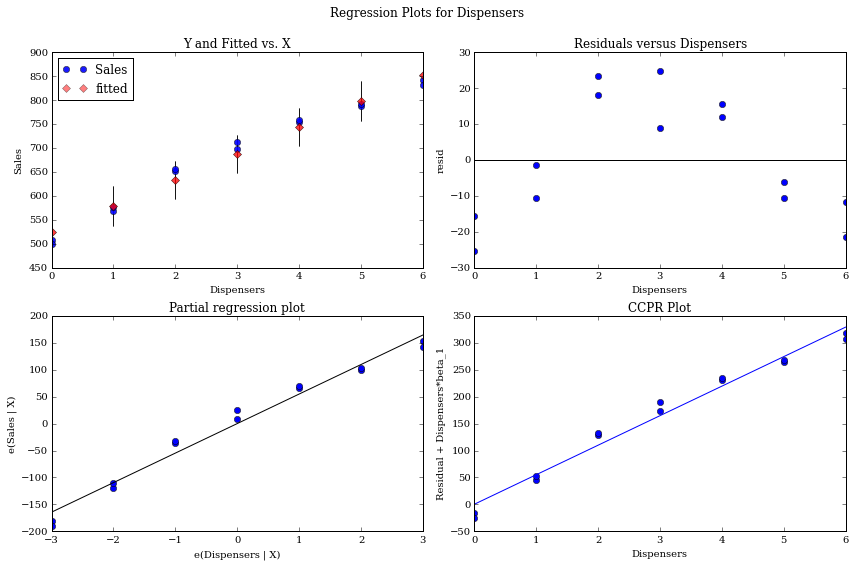

In [504]:
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(linear_model1,'Dispensers',fig=fig)

### Improving the model with a squared term, the R-Squared value has increased

In [505]:
Data = { 'Dispensers': Dispensers,
        'Dispensers2': Dispensers**2,
        'Sales': Sales}
df2 = pd.DataFrame(Data,columns=['Dispensers','Sales','Dispensers2'])
linear_model2 = sm.formula.ols(formula='Sales ~ Dispensers+Dispensers2',data=df2).fit()
linear_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1391.
Date:                Thu, 27 Jun 2019   Prob (F-statistic):           5.95e-14
Time:                        14:03:32   Log-Likelihood:                -47.038
No. Observations:                  14   AIC:                             100.1
Df Residuals:                      11   BIC:                             102.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     502.5560      4.850    103.619      0.000       491.881   513.231
Dispensers     80.3857      3.786     21.232      0.000        72.053    88.719
Dispensers2    -4.2488      0.606     -7.008      0.000        -5.583    -2.914
==============================================================================
Omnibus:                        1.946   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                0.919
Skew:                          -0.057   Prob(JB):                        0.632
Kurtosis:                       1.750   Cond. No.                         51.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

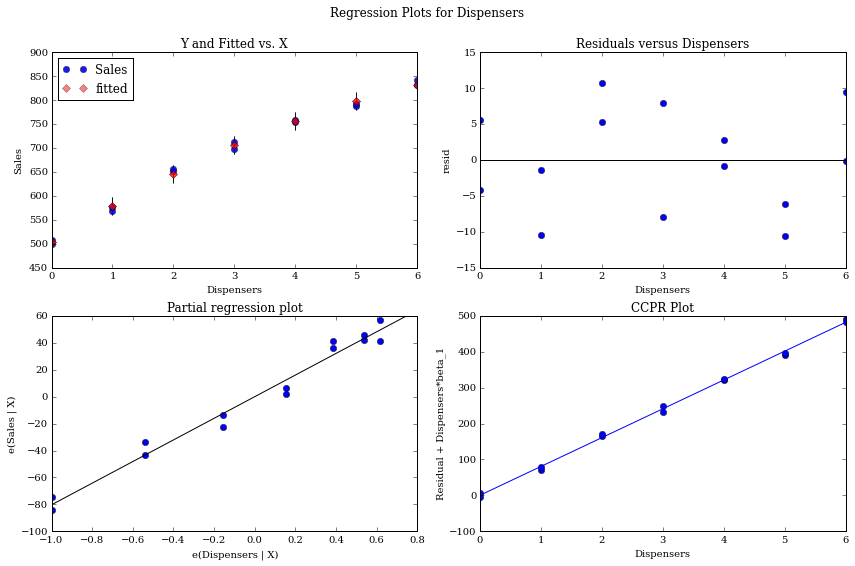

In [506]:
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(linear_model2,'Dispensers',fig=fig)

# Multiple linear regression, dummy variables, prediciting with train/test split 

### Load the sklearn diabetes dataset into a Dataframe and add in the columns names which are no longer present in the dataset 

In [525]:
data = datasets.load_diabetes()
Attributes = data['data']
Target = data['target']
cleandf = pd.DataFrame()
colnames = ['Age','Sex','Bmi', 'Average blood pressure','S1','S2','S3','S4','S5','S6']
cleandf = pd.DataFrame()
for n,i in enumerate(colnames):
    cleandf[i] = Attributes[:,n]
#lets add back the target column too 
cleandf['Target'] = Target

In [526]:
cleandf.head()

,Age,Sex,Bmi,Average blood pressure,S1,S2,S3,S4,S5,S6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### Convert the numeric 'Sex' column back into a string collumn

In [527]:
MaleFemale = []
for i in Attributes[:,1]:
    if np.sign(i) > 0:
        MaleFemale.append('Male')
    if np.sign(i) < 0:
        MaleFemale.append('Female')
MaleFemale = np.array(MaleFemale)
#drop the numeric Sex column and add in the original string column
cleandf = cleandf.drop('Sex',axis=1)
cleandf['sex'] = MaleFemale

In [528]:
cleandf.head()

,Age,Bmi,Average blood pressure,S1,S2,S3,S4,S5,S6,Target,sex
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,Male
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,Female
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,Male
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,Female
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,Female


### As an example of how to deal with catagorical variables, apply the pandas .get_dummies method to the 'sex' collumn we just created

In [529]:
#encode the binary catagorical data into the model with dummy variables
MFdummies = pd.get_dummies(MaleFemale)
#join our dummy variable and main dataframes 
cleandf = pd.concat([cleandf,MFdummies],axis=1)
cleandf.head()

,Age,Bmi,Average blood pressure,S1,S2,S3,S4,S5,S6,Target,sex,Female,Male
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,Male,0,1
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,Female,1,0
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,Male,0,1
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,Female,1,0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,Female,1,0


### Finally remove the string column we added so our dataframe is ready for splitting into test/training sets and a regression analysis

In [530]:
cleandf = cleandf.drop('sex',axis=1)
cleandf.head()

,Age,Bmi,Average blood pressure,S1,S2,S3,S4,S5,S6,Target,Female,Male
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,0,1
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,1,0
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,0,1
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1,0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,1,0


In [516]:
# Note this particular dataset has all its columns already normalised,
# if this weren't the case an important step in our analysis here would be to 
# scale our data in a meaningful way, for example such that each columns values
# go from 0 to 1 and are spread accordingly, this could be achieved with 
# sklearn MinMaxScalar 

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#cleandf = pd.DataFrame(scaler.fit_transform(cleandf), columns=cleandf.columns)

### Plot the columns in our data against the target variable to see which have linear relationships, and are therefore suitable for a linear regression analysis 

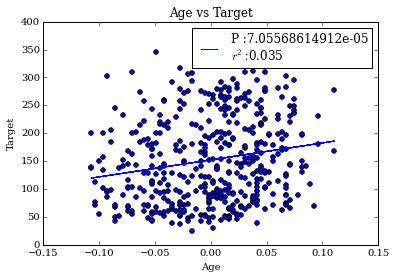

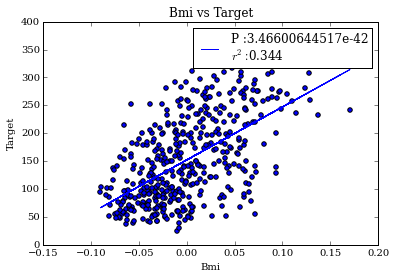

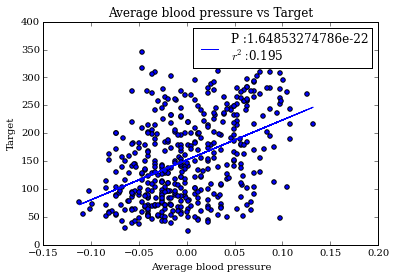

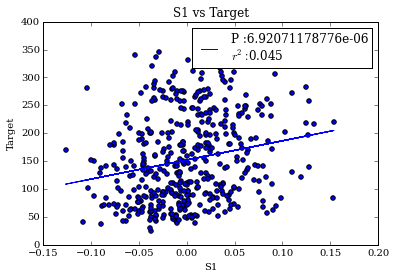

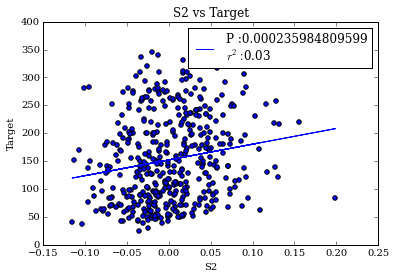

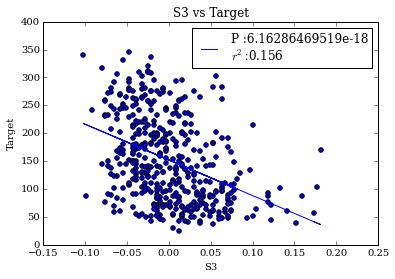

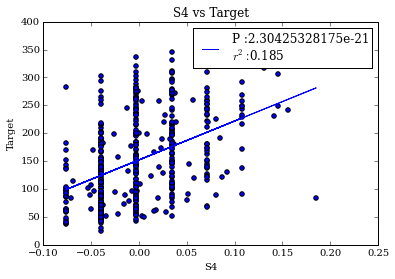

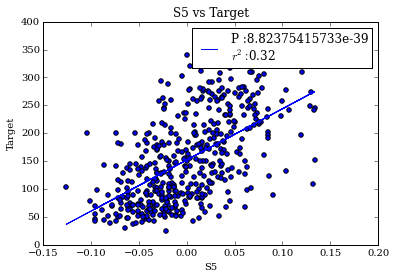

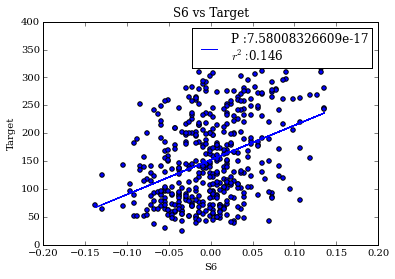

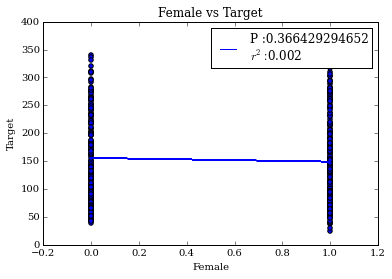

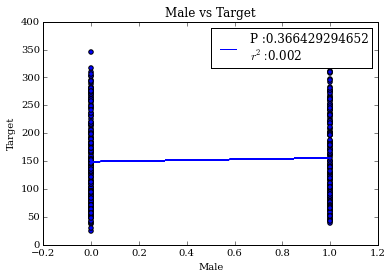

In [517]:
# Lets check our data for linear correlations with a simple plotting loop
for i in cleandf.columns:
    if i != 'Target':
        plt.figure()
        plt.scatter(cleandf[i],cleandf['Target'])
        m, c, r_val, p_val, stder = scipy.stats.linregress(cleandf[i],cleandf['Target'])
        def f(x,gradient, intercept):
            return gradient*x + intercept
        lobf = f(cleandf[i], m, c)
        plt.plot(cleandf[i], lobf, label='P :'+str(p_val)+'\n'+r'$r^{2} :$'+str(round(r_val**2,3)))
        plt.legend(loc='best')
        plt.title(i+' vs Target')
        plt.ylabel('Target')
        plt.xlabel(i)

### Add the linear attributes to a new array, along with the Target data

In [ ]:
# we have six Attributes that appear to have a reasonable linear trend with the Target
# Lets put them in a new object, and do the same for our target variable
X = np.zeros((442,6))
Y = np.zeros((442,1))
X[:,0] = cleandf['Average blood pressure']
X[:,1] = cleandf['Bmi']
X[:,2] = cleandf['S4']
X[:,3] = cleandf['S4']
X[:,4] = cleandf['S5']
X[:,5] = cleandf['S6']
Y[:,0] = cleandf['Target']

### Split the data into  80/20 training/testing sets, fit a linear regression model, plot the model predictions against the testing data and observe the model score

This model explains:  33.6 % of the variability


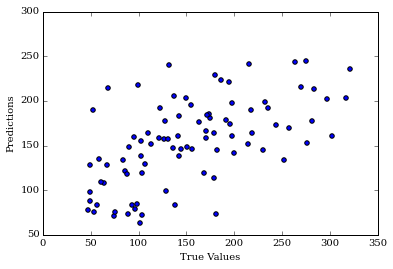

In [519]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) 
lm = LinearRegression()
# Fit the model with our training data 
model = lm.fit(X_train, y_train)
# Use the linear regression model to predict the results of the test data
predictions = lm.predict(X_test)
plt.figure()
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
print('This model explains: ',round(model.score(X_test, y_test),3)*100,'% of the variability')

### But wait! some of our variables may be colinear, visually check for this with a quick plotting loop 

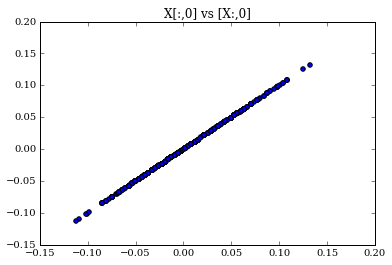

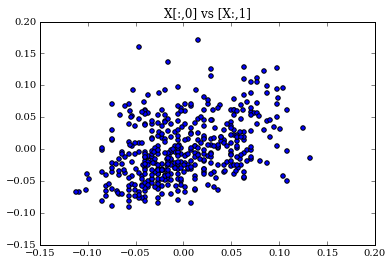

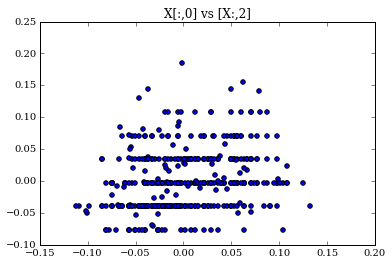

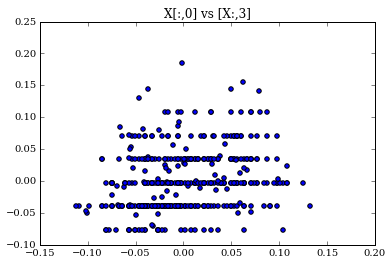

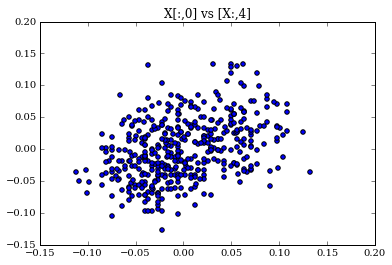

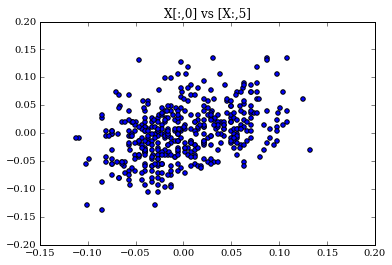

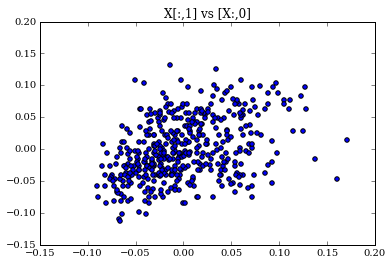

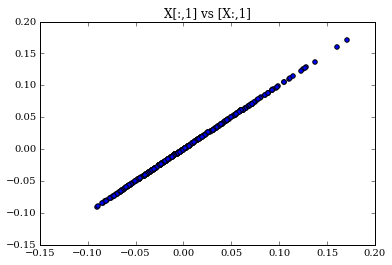

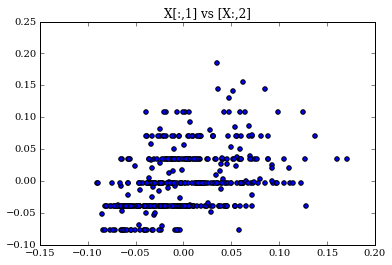

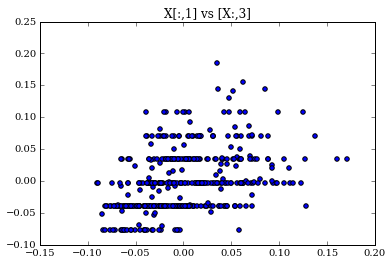

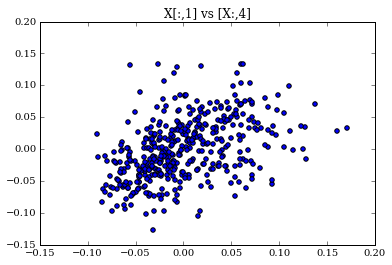

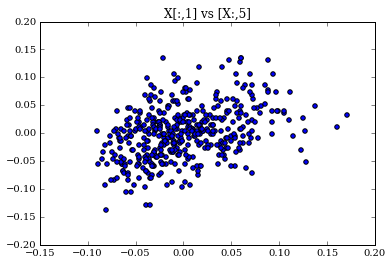

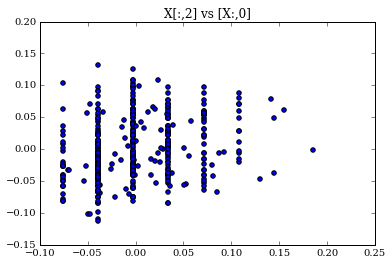

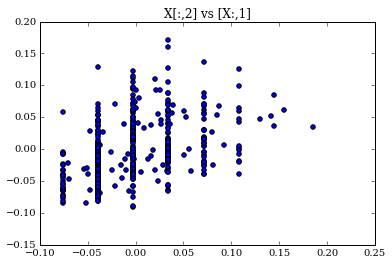

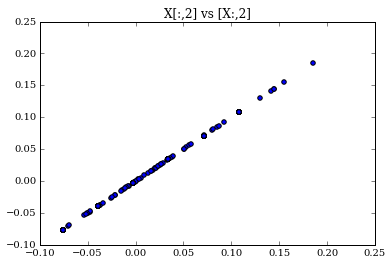

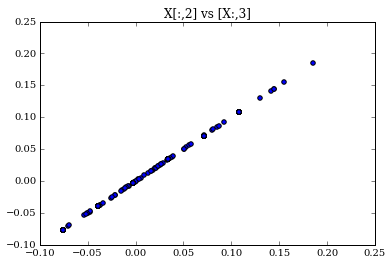

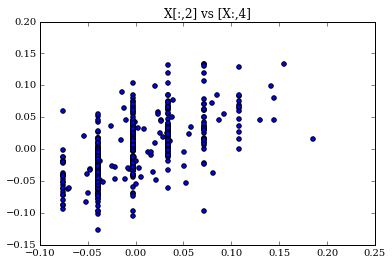

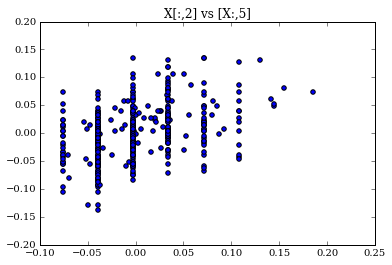

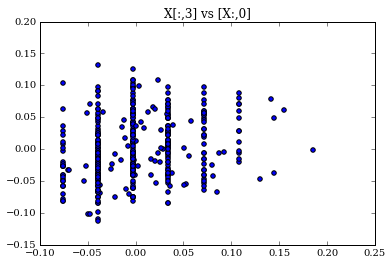

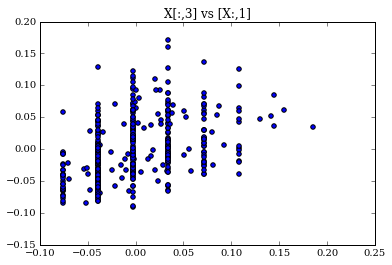

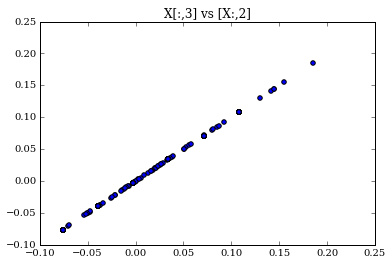

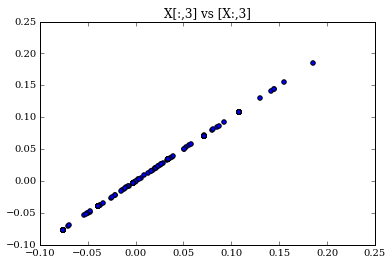

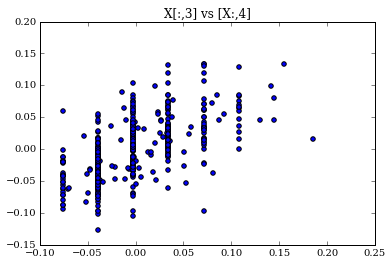

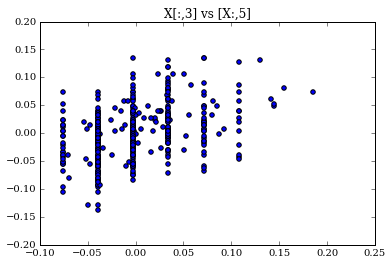

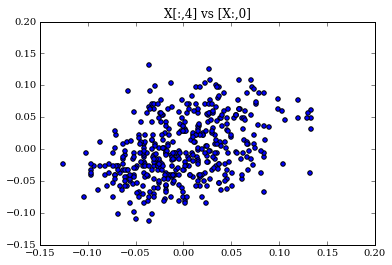

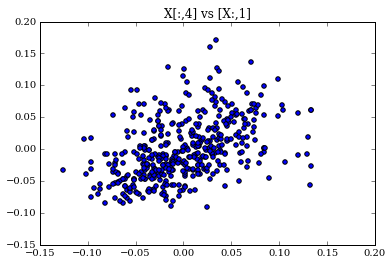

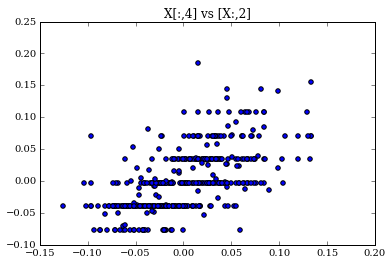

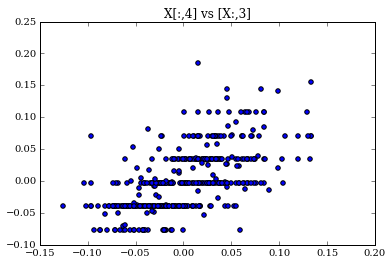

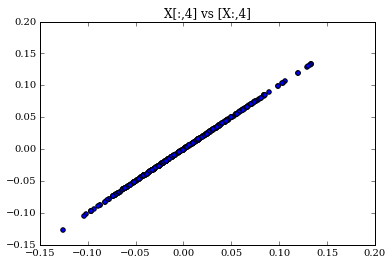

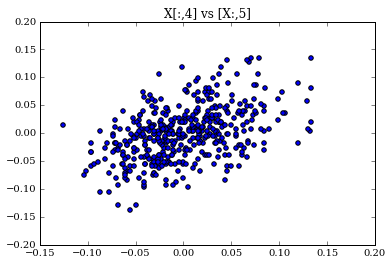

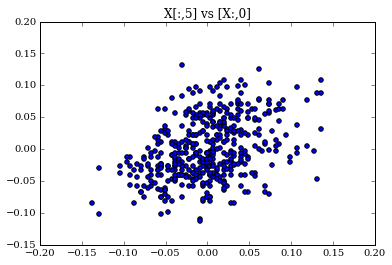

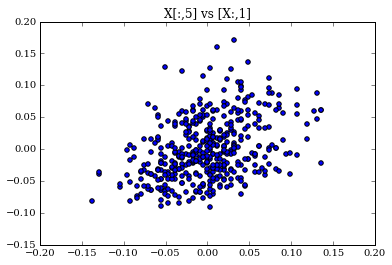

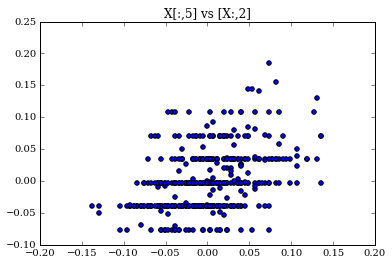

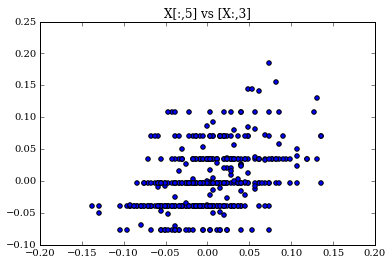

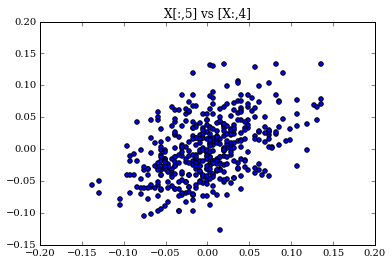

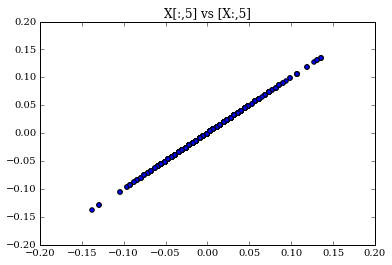

In [520]:
for i in range(6):
    for j in range(6):
        plt.figure()
        plt.scatter(X[:,i],X[:,j])
        plt.title('X[:,'+str(i)+'] vs [X:,' +str(j)+']')

### Drop the colinear variables and refit the model.

In [521]:
# it can be seen that X[:,0] correlates with X[:,[1,4,5]]
# and that X[:,2] correlates with X[:,3] 
# therefore to avoid overfitting due to collinearity we need to drop
# X[:,[1,4,5]] i.e our Target variable Y depends on X[:,0] and X[:,2] only

#lets redine X accordingly 
X = np.zeros((442,2))
X[:,0] = cleandf['Average blood pressure']
X[:,1] = cleandf['S4']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) 

lm = LinearRegression()
# Fit the model with our training data 
model = lm.fit(X_train, y_train)
# Use the linear regression model to predict the results of the test data
predictions = lm.predict(X_test)

This model explains:  26.8 % of the variability


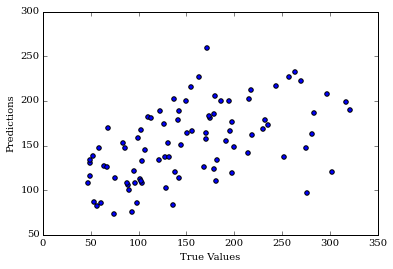

In [522]:
plt.figure()
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
print('This model explains: ',round(model.score(X_test, y_test),3)*100,'% of the variability')

In [531]:
# The fact we dropped 4 variables but only lost approx. 7% variability is 
# indicative that we were previously overfitting! our final model here based 
# on just two variables from the data set is more correct than the model
# based on all six linear vs Target variables. 
# Conclusion: ~26% of the variability predicting diabetes outcome is dependent
# on 'Average blood pressure' and 'S4'